In [115]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [116]:
#đọc dl từ file csv
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

#liệt kê danh sách các cột
print(list(data.columns))

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [117]:
# Thông tin thuộc tính:

# nơi đến: Không có nơi khẩn cấp, Nhà, Nơi làm việc
# Hành khách: Một mình, Bạn bè, Trẻ em, Đối tác (là hành khách trên xe)
# thời tiết: Nắng, Mưa, Tuyết
# nhiệt độ: 55, 80, 30
# giờ: 2 giờ chiều , 10AM, 6PM, 7AM, 10PM
# coupon: Nhà hàng(<$20), Coffee House, Mang đi & Mang về, Bar, Restaurant($20-$50)
# hết hạn: 1ngày, 2h (phiếu hết hạn sau 1 ngày hoặc sau 2 giờ)
# giới tính: Nữ, Nam
# tuổi: 21, 46, 26, 31, 41, 50+, 36, dưới 21
# Tình trạng hôn nhân: Chưa kết hôn, Độc thân, Đã kết hôn, Đã ly hôn, Góa phụ
# đã cóTrẻ em:1, 0 học vấn: Một số trường đại học - không bằng cấp, Bằng cử nhân, Bằng cao đẳng, Tốt nghiệp trung học phổ thông, Bằng sau đại học (Thạc sĩ hoặc Tiến sĩ), 
# Một số nghề nghiệp trung học phổ thông: Thất nghiệp, Kiến trúc & Kỹ thuật, Sinh viên, Giáo dục & Đào tạo & Thư viện, Hỗ trợ chăm sóc sức khỏe, Chăm sóc sức khỏe Người hành nghề & Kỹ thuật, Bán hàng & Liên quan, Quản lý, Thiết kế Nghệ thuật Giải trí Thể thao & Truyền thông, Máy tính & Toán học, Đời sống Vật lý Khoa học Xã hội, Chăm sóc & Dịch vụ Cá nhân, Dịch vụ Cộng đồng & Xã hội, Văn phòng & Hỗ trợ Hành chính, Xây dựng & Khai thác, Pháp lý, Đã nghỉ hưu, Sắp đặt Bảo trì & Sửa chữa, Vận chuyển & Di chuyển Vật liệu, Kinh doanh & Tài chính, Dịch vụ Bảo vệ, Liên quan đến Chuẩn bị & Phục vụ Thực phẩm, Nghề nghiệp Sản xuất, Vệ sinh & Bảo trì Tòa nhà & Sân bãi,Thu nhập từ Nông nghiệp Đánh cá & Lâm nghiệp: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 trở lên, $87500 - $99999, Ít hơn $25000 - $37499, $100000 trở lên, $87500 - $99999, Ít hơn $25000 - $37499 Thanh: không bao giờ, ít hơn , gt8, nan4~8 (nghĩa đặc trưng: bạn đến quán bar bao nhiêu lần mỗi tháng?) CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (nghĩa đặc trưng: bạn đi bao nhiêu lần đến quán cà phê mỗi tháng?) CarryAway:n4~8, 1~3, gt8, less1, never (nghĩa đặc trưng: bạn nhận được đồ ăn mang đi bao nhiêu lần mỗi tháng?) RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (nghĩa đặc trưng: bạn đến nhà hàng bao nhiêu lần với chi phí trung bình cho mỗi người dưới 20 đô la mỗi tháng?) Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan ( ý nghĩa đặc trưng:bạn đến nhà hàng bao nhiêu lần với chi phí trung bình cho mỗi người là $20 - $50 mỗi tháng?) toCouponGEQ15 phút:0,1 (ý nghĩa đặc trưng: khoảng cách lái xe đến nhà hàng/quán bar để sử dụng phiếu giảm giá lớn hơn 15 phút) đến Phiếu giảm giá
# GEQ25 phút:0, 1 (ý nghĩa đặc trưng: khoảng cách lái xe đến nhà hàng/quán bar để sử dụng phiếu giảm giá lớn hơn 25 phút) cùng hướng:0, 1 (ý nghĩa đặc trưng: nhà hàng/quán bar có cùng hướng với điểm đến hiện tại của bạn không)
# direction_opp:1, 0 (ý nghĩa đặc trưng: nhà hàng/quán bar có cùng hướng với điểm đến hiện tại của bạn không điểm đến)
# Y:1, 0 (liệu phiếu giảm giá có được chấp nhận hay không)

In [118]:
#Hiển thị dữ liệu
data.head(7)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


In [119]:
#hiển thị số lượng 0 là phiếu giảm giá không được chấp nhận, 1 là được chấp nhận
#kết quả: 7210 được chấp nhận phiếu giảm giá, 5474 là không được chấp nhận
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

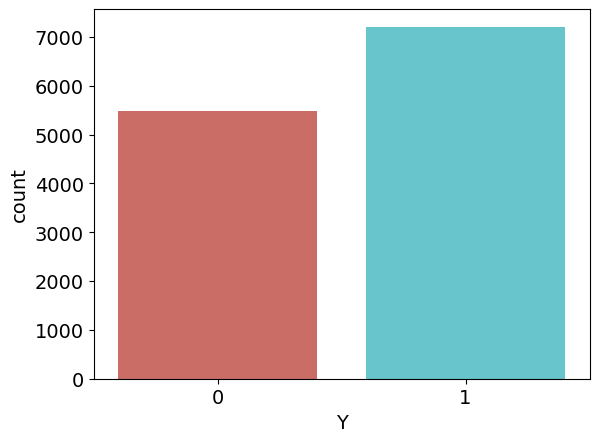

In [120]:
#Biểu đồ cột sử dụng thư viện seaborn để hiển thị, 
# cho ta thấy sự chênh lệch sự chênh lệch về việc liệu phiếu giảm giá có được chấp nhận hay không
sns.countplot(x='Y', data=data, palette='hls')
plt.show()

In [121]:
data.groupby('Y').mean()

C:\Users\HongPhong\AppData\Local\Temp\ipykernel_7868\1857012000.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Y').mean()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
Y,,,,,,,
0,61.955608,0.439898,1.0,0.607965,0.157654,0.207892,0.792108
1,64.323856,0.394591,1.0,0.526214,0.089875,0.219972,0.780028


In [122]:
data.groupby('destination').mean()

C:\Users\HongPhong\AppData\Local\Temp\ipykernel_7868\2505372342.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('destination').mean()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,,,,,,,,
Home,61.495212,0.407476,1.0,0.446401,0.145814,0.470806,0.529194,0.506333
No Urgent Place,65.922330,0.425752,1.0,0.579978,0.000000,0.000000,1.000000,0.633774
Work,59.946271,0.397914,1.0,0.642541,0.328382,0.379267,0.620733,0.502212


##### driving situation to the destination and asking if he accepts the coupon #####


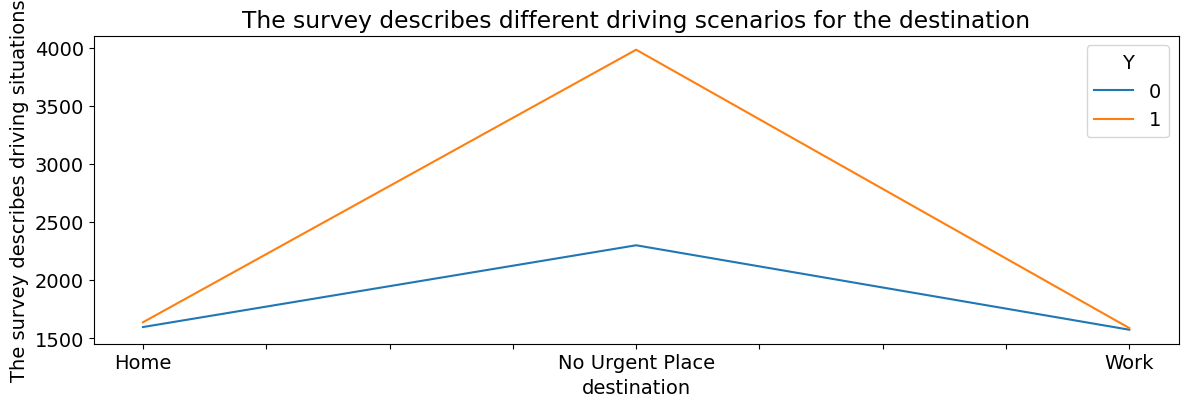

In [123]:
pd.crosstab(data['destination'], data['Y']).plot(kind='line', figsize=(14, 4))
plt.title('The survey describes different driving scenarios for the destination')
plt.xlabel('destination')
plt.ylabel('The survey describes driving situations')
print("##### driving situation to the destination and asking if he accepts the coupon #####")

##### driving situation to the destination and asking if he accepts the coupon #####


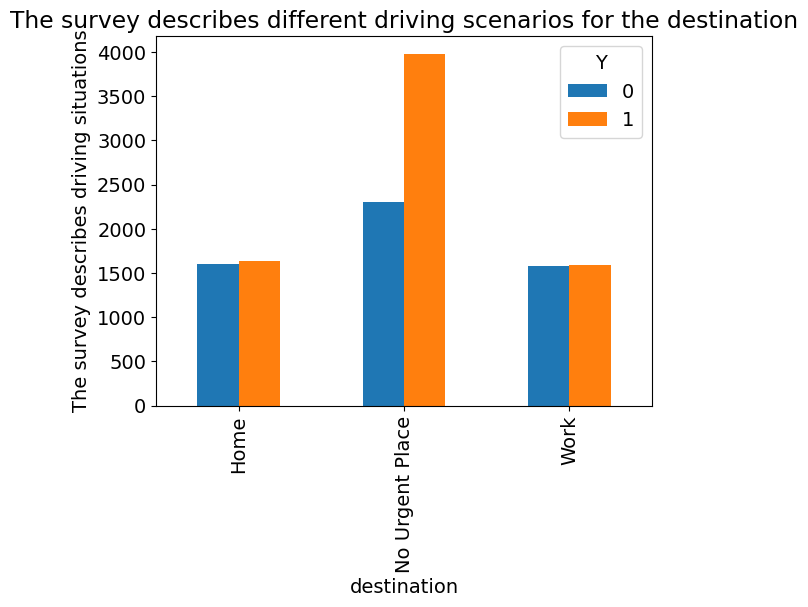

In [124]:
pd.crosstab(data['destination'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the destination')
plt.xlabel('destination')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=10)
print("##### driving situation to the destination and asking if he accepts the coupon #####")

##### driving situation to the passanger and asking if he accepts the coupon #####


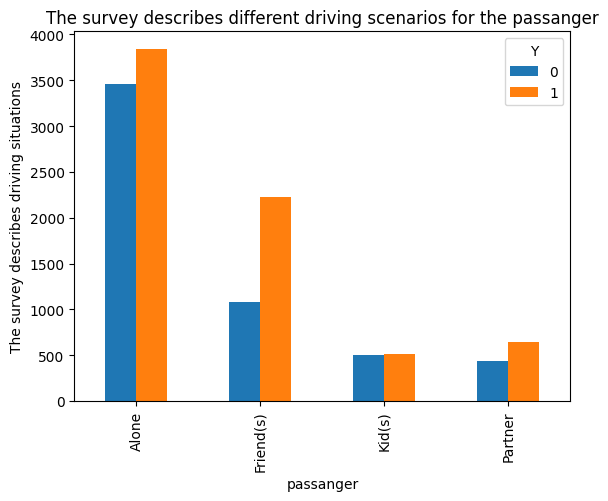

In [125]:
pd.crosstab(data['passanger'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the passanger')
plt.xlabel('passanger')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the passanger and asking if he accepts the coupon #####")

##### driving situation to the weather and asking if he accepts the coupon #####


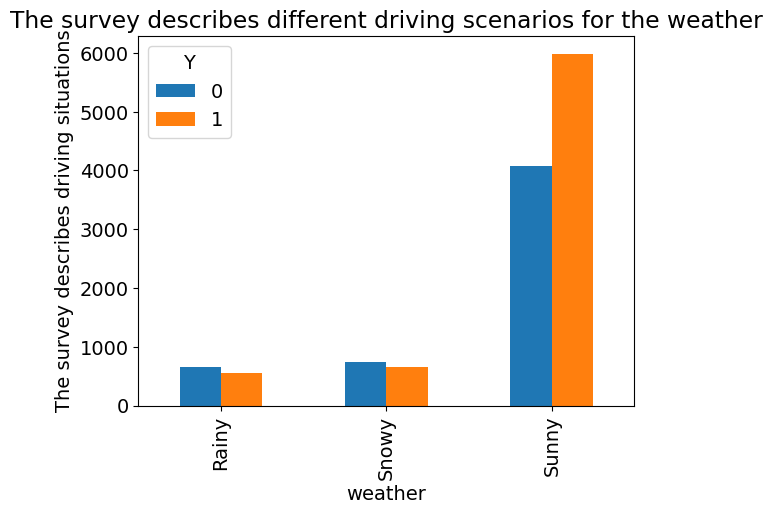

In [126]:
pd.crosstab(data['weather'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the weather')
plt.xlabel('weather')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the weather and asking if he accepts the coupon #####")

##### driving situation to the temperature and asking if he accepts the coupon #####


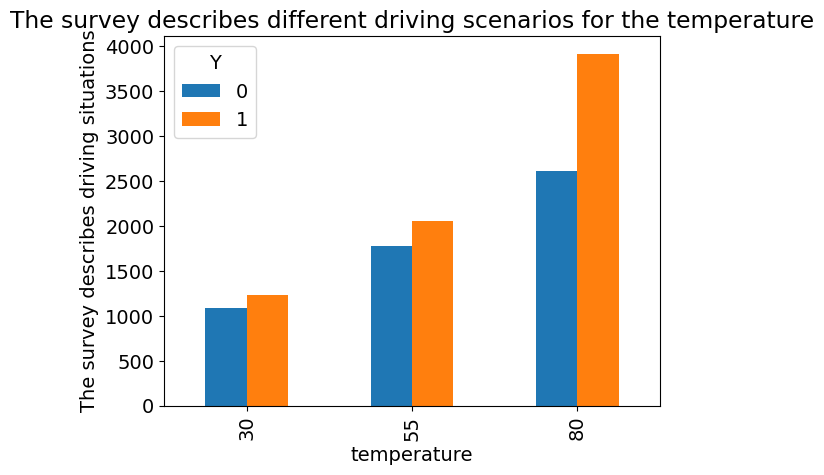

In [127]:
pd.crosstab(data['temperature'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the temperature')
plt.xlabel('temperature')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the temperature and asking if he accepts the coupon #####")

##### driving situation to the time and asking if he accepts the coupon #####


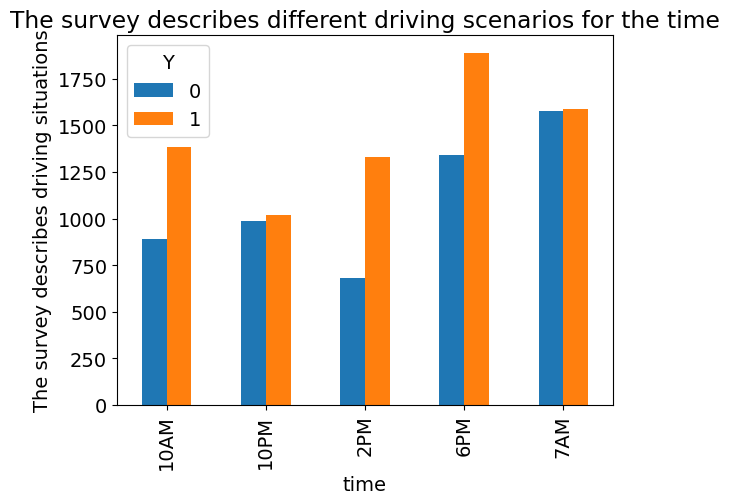

In [128]:
pd.crosstab(data['time'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the time')
plt.xlabel('time')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the time and asking if he accepts the coupon #####")

##### driving situation to the coupon and asking if he accepts the coupon #####


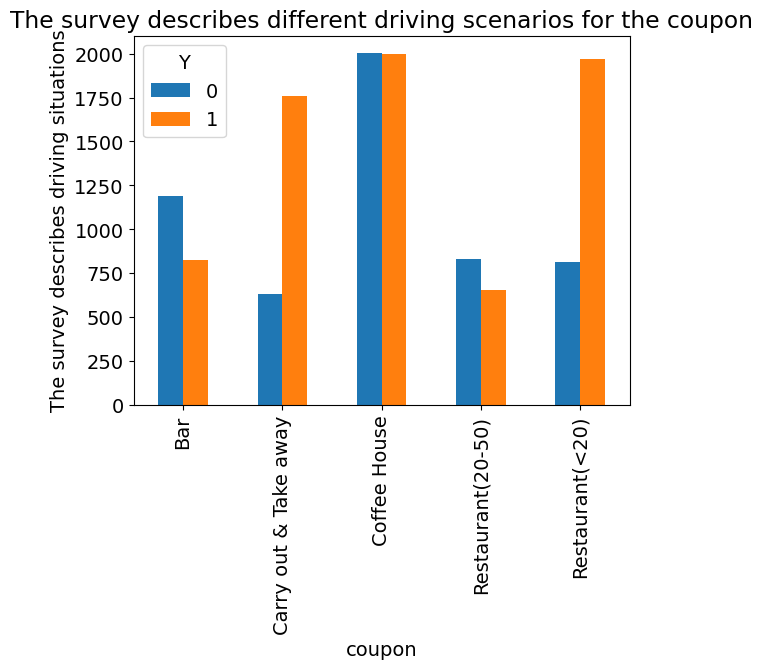

In [129]:
pd.crosstab(data['coupon'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the coupon')
plt.xlabel('coupon')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=13)
print("##### driving situation to the coupon and asking if he accepts the coupon #####")

##### driving situation to the expiration and asking if he accepts the coupon #####


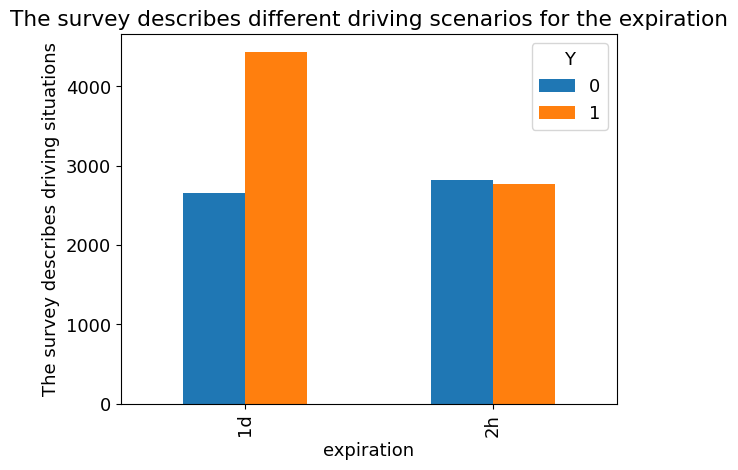

In [130]:
pd.crosstab(data['expiration'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the expiration')
plt.xlabel('expiration')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the expiration and asking if he accepts the coupon #####")

##### driving situation to the gender and asking if he accepts the coupon #####


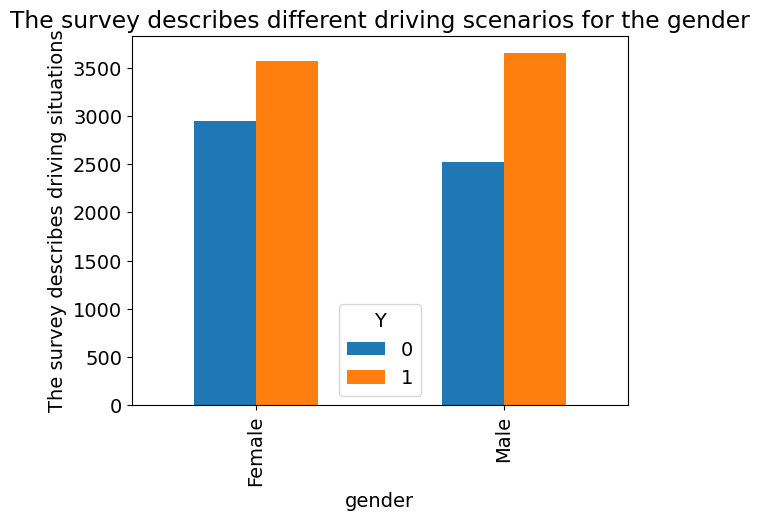

In [131]:
pd.crosstab(data['gender'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the gender')
plt.xlabel('gender')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the gender and asking if he accepts the coupon #####")

##### driving situation to the age and asking if he accepts the coupon #####


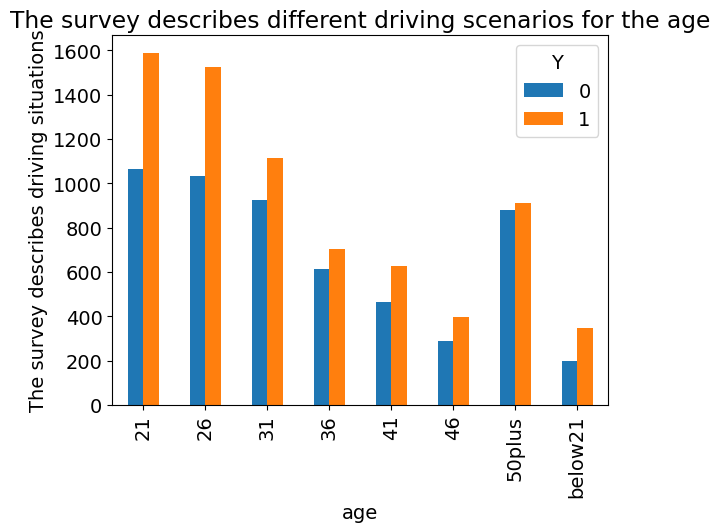

In [132]:
pd.crosstab(data['age'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the age')
plt.xlabel('age')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the age and asking if he accepts the coupon #####")

##### driving situation to the maritalStatus and asking if he accepts the coupon #####


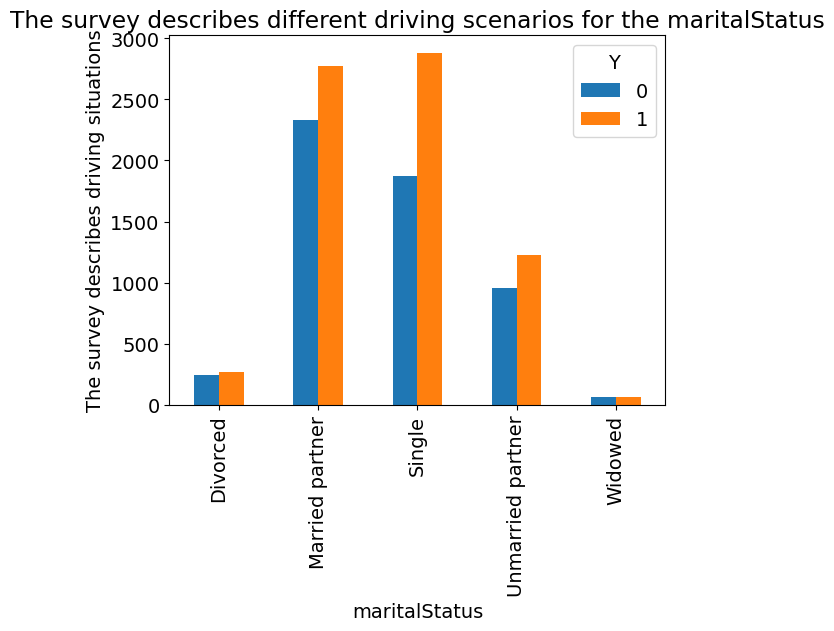

In [133]:
pd.crosstab(data['maritalStatus'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the maritalStatus')
plt.xlabel('maritalStatus')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the maritalStatus and asking if he accepts the coupon #####")

##### driving situation to the has_children and asking if he accepts the coupon #####


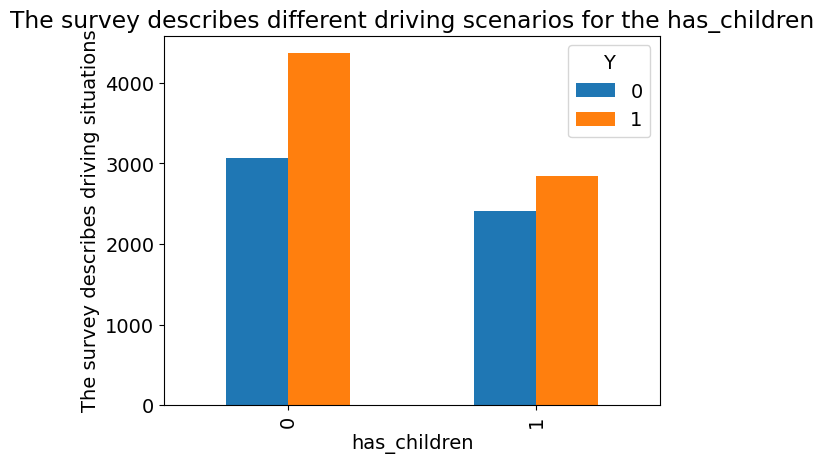

In [134]:
pd.crosstab(data['has_children'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the has_children')
plt.xlabel('has_children')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the has_children and asking if he accepts the coupon #####")

##### driving situation to the education and asking if he accepts the coupon #####


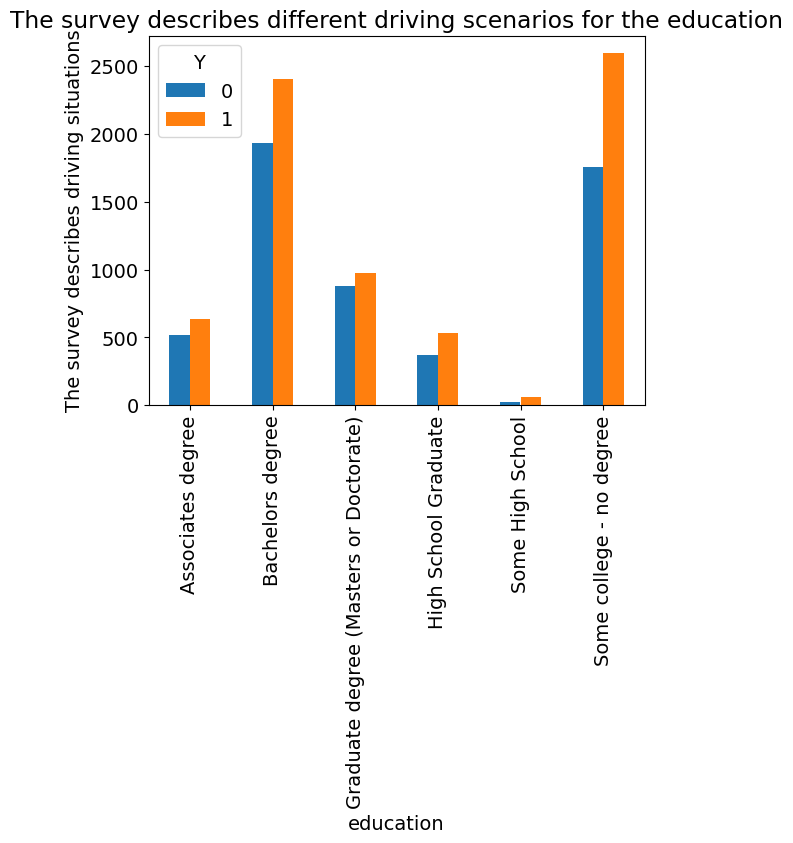

In [135]:
pd.crosstab(data['education'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the education')
plt.xlabel('education')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the education and asking if he accepts the coupon #####")

##### driving situation to the occupation and asking if he accepts the coupon #####


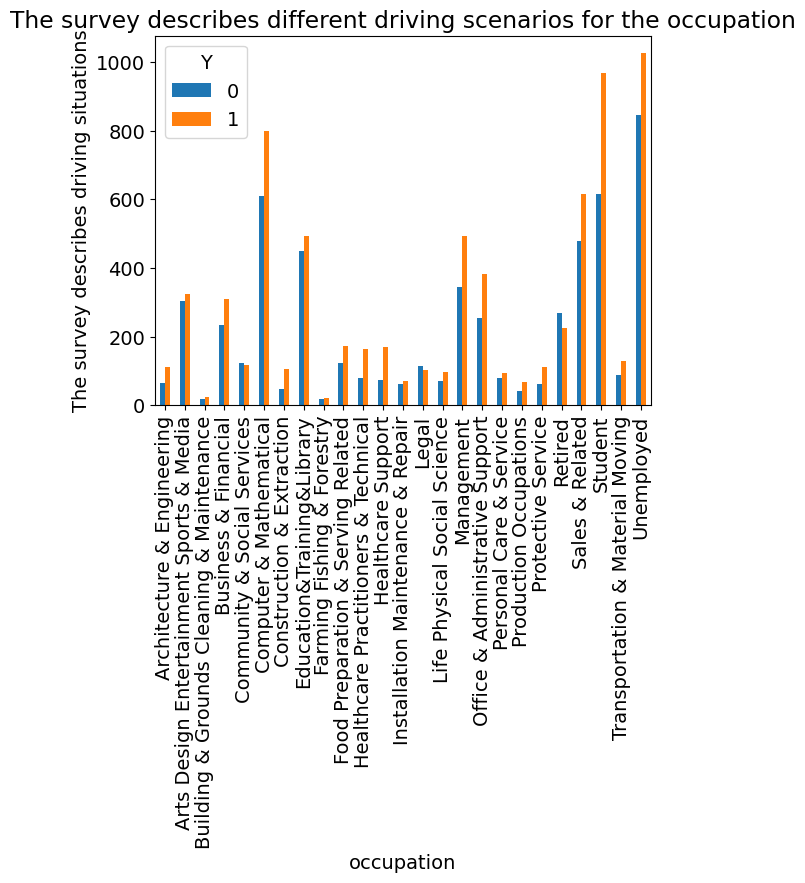

In [136]:
pd.crosstab(data['occupation'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the occupation')
plt.xlabel('occupation')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the occupation and asking if he accepts the coupon #####")

##### driving situation to the income and asking if he accepts the coupon #####


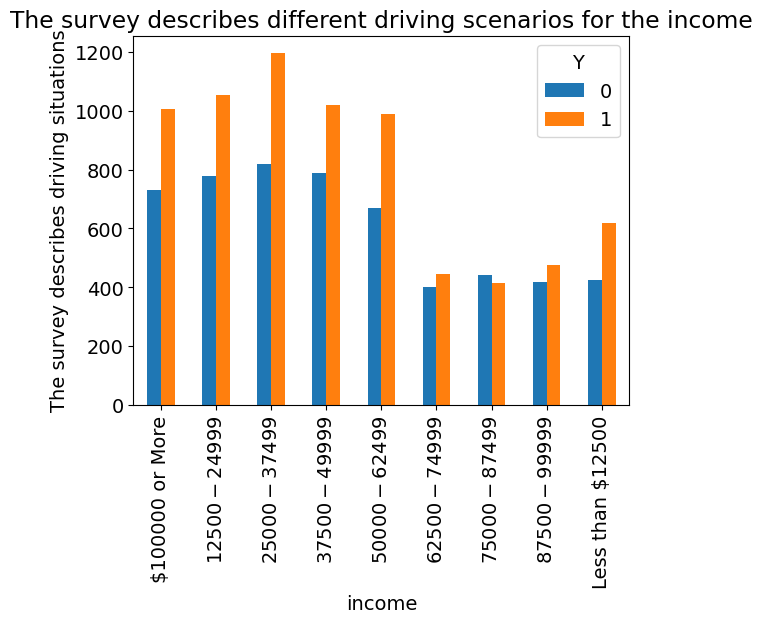

In [137]:
pd.crosstab(data['income'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the income')
plt.xlabel('income')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=7)
print("##### driving situation to the income and asking if he accepts the coupon #####")

##### driving situation to the car and asking if he accepts the coupon #####


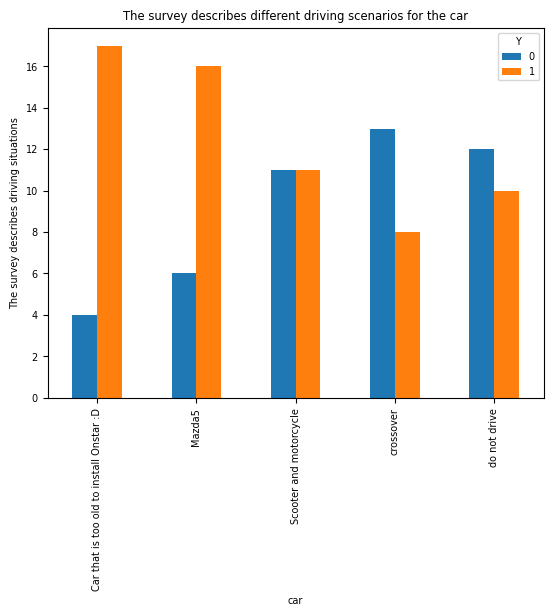

In [138]:
pd.crosstab(data['car'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the car')
plt.xlabel('car')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the car and asking if he accepts the coupon #####")

##### driving situation to the Bar and asking if he accepts the coupon #####


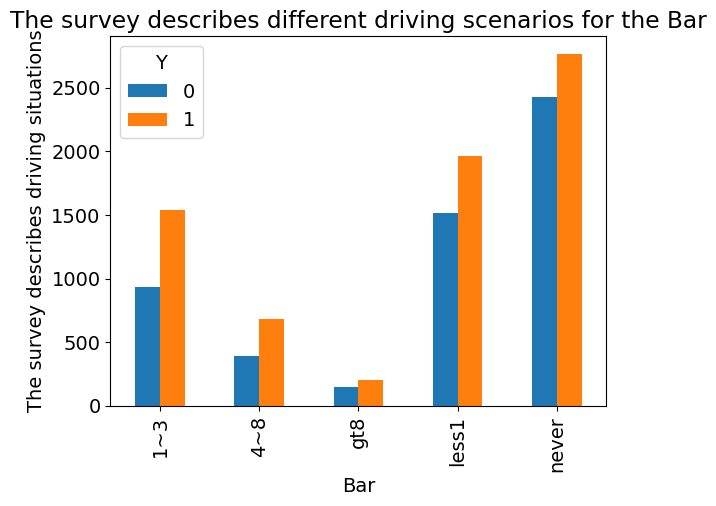

In [139]:
pd.crosstab(data['Bar'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the Bar')
plt.xlabel('Bar')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=7)
print("##### driving situation to the Bar and asking if he accepts the coupon #####")

##### driving situation to the CoffeeHouse and asking if he accepts the coupon #####


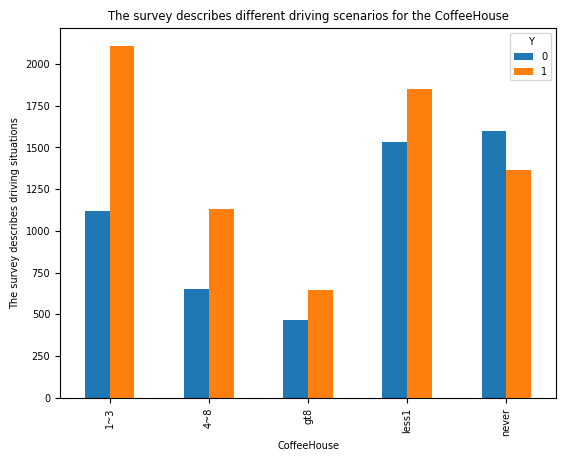

In [140]:
pd.crosstab(data['CoffeeHouse'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the CoffeeHouse')
plt.xlabel('CoffeeHouse')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the CoffeeHouse and asking if he accepts the coupon #####")

##### driving situation to the CarryAway and asking if he accepts the coupon #####


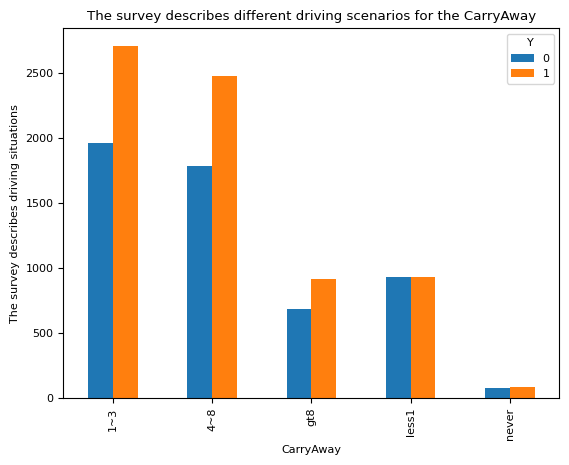

In [141]:
pd.crosstab(data['CarryAway'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the CarryAway')
plt.xlabel('CarryAway')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the CarryAway and asking if he accepts the coupon #####")

##### driving situation to the RestaurantLessThan20 and asking if he accepts the coupon #####


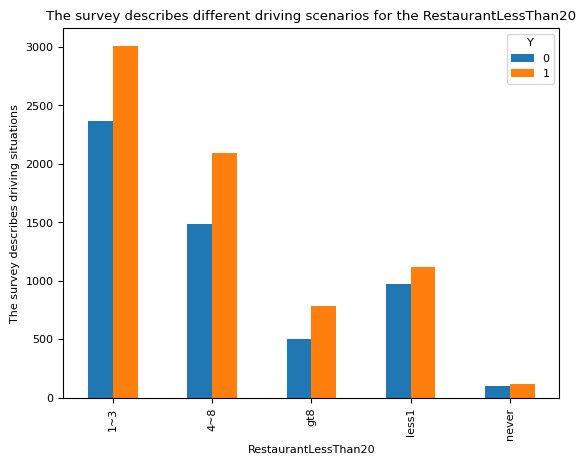

In [142]:
pd.crosstab(data['RestaurantLessThan20'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the RestaurantLessThan20')
plt.xlabel('RestaurantLessThan20')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the RestaurantLessThan20 and asking if he accepts the coupon #####")

##### driving situation to the Restaurant20To50 and asking if he accepts the coupon #####


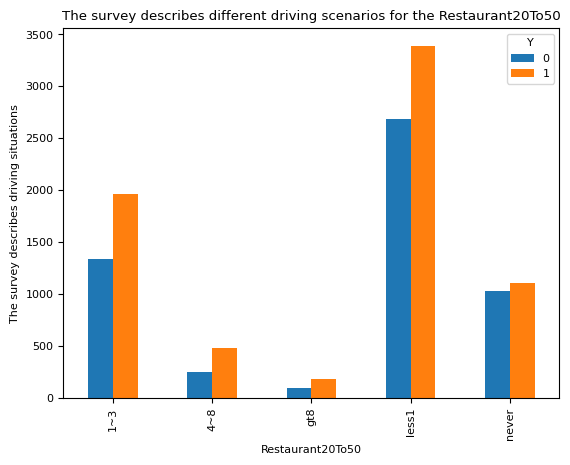

In [143]:
pd.crosstab(data['Restaurant20To50'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the Restaurant20To50')
plt.xlabel('Restaurant20To50')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the Restaurant20To50 and asking if he accepts the coupon #####")

##### driving situation to the toCoupon_GEQ5min and asking if he accepts the coupon #####


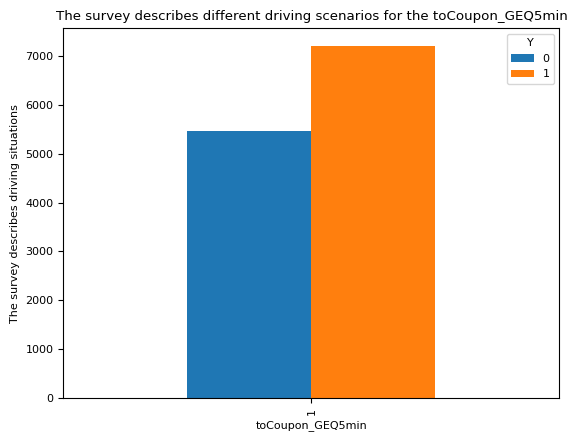

In [144]:
pd.crosstab(data['toCoupon_GEQ5min'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the toCoupon_GEQ5min')
plt.xlabel('toCoupon_GEQ5min')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the toCoupon_GEQ5min and asking if he accepts the coupon #####")

##### driving situation to the toCoupon_GEQ15min and asking if he accepts the coupon #####


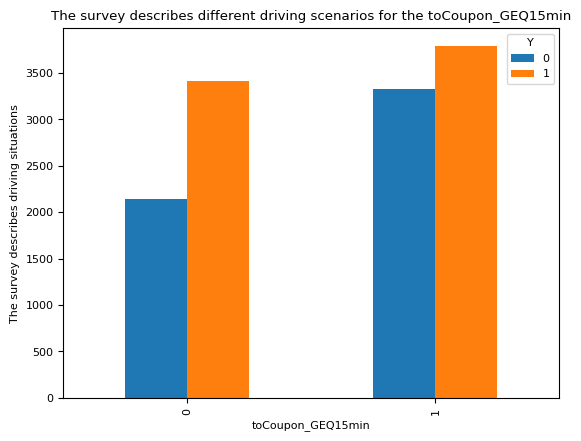

In [145]:
pd.crosstab(data['toCoupon_GEQ15min'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the toCoupon_GEQ15min')
plt.xlabel('toCoupon_GEQ15min')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the toCoupon_GEQ15min and asking if he accepts the coupon #####")

##### driving situation to the toCoupon_GEQ25min and asking if he accepts the coupon #####


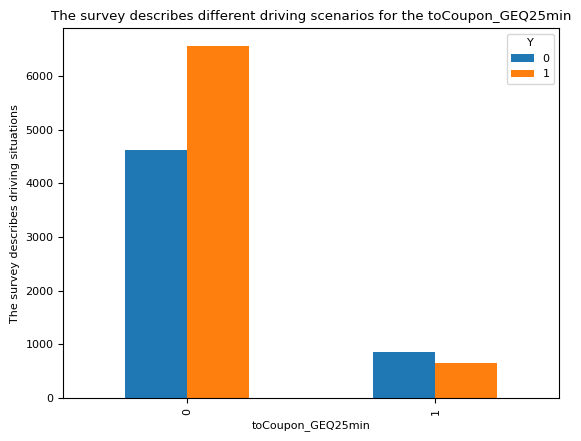

In [146]:
pd.crosstab(data['toCoupon_GEQ25min'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the toCoupon_GEQ25min')
plt.xlabel('toCoupon_GEQ25min')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the toCoupon_GEQ25min and asking if he accepts the coupon #####")

##### driving situation to the direction_same and asking if he accepts the coupon #####


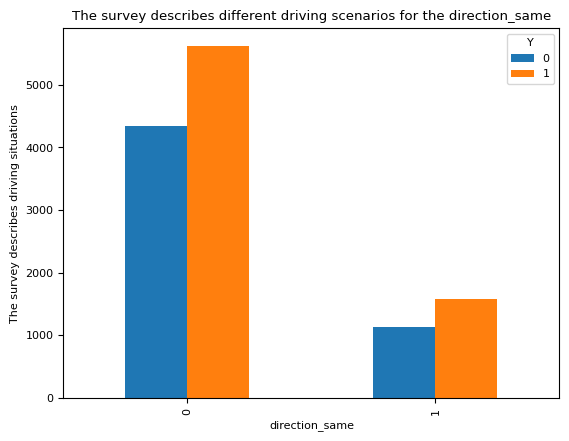

In [147]:
pd.crosstab(data['direction_same'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the direction_same')
plt.xlabel('direction_same')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=8)
print("##### driving situation to the direction_same and asking if he accepts the coupon #####")

##### driving situation to the direction_opp and asking if he accepts the coupon #####


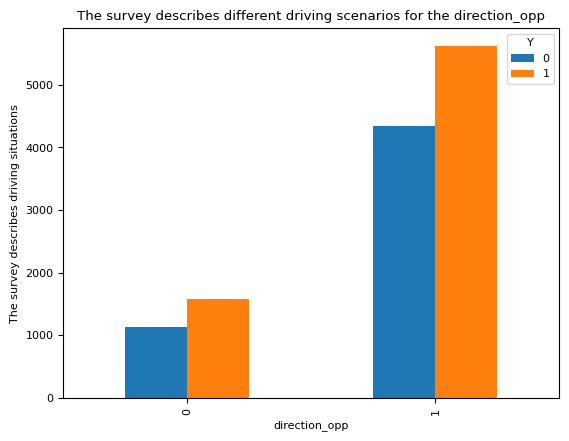

In [148]:
pd.crosstab(data['direction_opp'], data['Y']).plot(kind='bar')
plt.title('The survey describes different driving scenarios for the direction_opp')
plt.xlabel('direction_opp')
plt.ylabel('The survey describes driving situations')
plt.rc('font', size=14)
print("##### driving situation to the direction_opp and asking if he accepts the coupon #####")

In [149]:
#load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

df.shape #lets check the dimensionality of the raw data
#Xem xét các loại dữ liệu
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [150]:
cat_features = [
    'destination', 'passanger', 'weather', 'time','coupon','expiration', 'gender', 'age','maritalStatus', 
    'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

for feature in cat_features:
    print(feature)
    job_list = pd.get_dummies(data[feature], prefix = feature)
    new_data = data.join(job_list)
    data = new_data

data.head()

destination
passanger
weather
time
coupon
expiration
gender
age
maritalStatus
education
occupation
income
car
Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1,0,0,0,1,0,0,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,0,0,1,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,1,0,0,0,1,0,0,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,0,0,1,0,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,1,0,0,0,1,0,0,0,0


In [151]:
data_features = data.columns.values.tolist()
print(data_features)
remove_features = [
    'destination', 'passanger', 'weather', 'time','coupon','expiration', 'gender', 'age','maritalStatus', 'education', 
    'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

to_keep_features = [i for i in data_features if i not in remove_features]
print(to_keep_features)

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y', 'destination_Home', 'destination_No Urgent Place', 'destination_Work', 'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner', 'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM', 'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'coupon_Bar', 'coupon_Carry out & Take away', 'coupon_Coffee House', 'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_1d', 'expiration_2h', 'gender_Female', 'gender_Male', 'age_21', 'age_26', 'age_31', 'age_36', 'age_41', 'age_46', 'age_50plus', 'age_below21', 'maritalStatus_Divorced', 'maritalStatus_Married partner', 'maritalStatus_Single', 'maritalSt

In [152]:
data_final = data[to_keep_features]
data_final.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,80,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,80,1,1,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
3,80,1,1,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,80,1,1,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [153]:
features = np.array(data_final.loc[:, data_final.columns != 'Y'])
print(features)

[[55  1  1 ...  0  0  0]
 [80  1  1 ...  0  0  0]
 [80  1  1 ...  0  0  0]
 ...
 [30  0  1 ...  0  0  0]
 [30  0  1 ...  0  0  0]
 [80  0  1 ...  0  0  0]]


In [154]:
targets = np.array(data_final.loc[:, data_final.columns == 'Y'])
print(targets)

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [155]:
train_features, test_features, train_targets, test_targets = train_test_split(
    features, targets, test_size = 0.3, random_state=0
)
print("##### Training and test datasets #####")
print("Training size: ", len(train_targets))
print("Test size: ", len(test_targets))
print(test_targets)

##### Training and test datasets #####
Training size:  8878
Test size:  3806
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [156]:
classifier_logreg = LogisticRegression()
classifier_logreg.fit(train_features, train_targets)

C:\Users\HongPhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HongPhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
predictions = classifier_logreg.predict(test_features)
print("##### Prediction results of Logistic Regression #####")
print("Target labels: ", test_targets.T)
print("Prediction labels:  ", predictions)

##### Prediction results of Logistic Regression #####
Target labels:  [[0 1 0 ... 0 1 0]]
Prediction labels:   [1 1 0 ... 0 1 0]


In [158]:
accuracy = 100 * accuracy_score(test_targets, predictions)
print("##### Prediction accuracy of Logistic Regression #####")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

##### Prediction accuracy of Logistic Regression #####
Accuracy:  67.39358906988964
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1696
           1       0.68      0.77      0.72      2110

    accuracy                           0.67      3806
   macro avg       0.67      0.66      0.66      3806
weighted avg       0.67      0.67      0.67      3806



In [159]:
predictions = classifier_logreg.predict(train_features)
print("##### Training - Prediction results of Logistic Regression #####")
print("Target labels: ", train_targets.T)
print("Prediction labels:  ", predictions)

##### Training - Prediction results of Logistic Regression #####
Target labels:  [[0 1 0 ... 0 0 1]]
Prediction labels:   [1 1 0 ... 0 0 1]


In [160]:
accuracy = 100 * accuracy_score(train_targets, predictions)
print("##### Prediction accuracy of Logistic Regression #####")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

##### Prediction accuracy of Logistic Regression #####
Accuracy:  69.80175715251183
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      3778
           1       0.72      0.79      0.75      5100

    accuracy                           0.70      8878
   macro avg       0.69      0.68      0.68      8878
weighted avg       0.70      0.70      0.69      8878



In [161]:
from sklearn import neighbors
classifier_KNN = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
classifier_KNN.fit(train_features, train_targets)

# K-nearest neighbor
predictions = classifier_KNN.predict(train_features)
print("##### Training - Prediction results of KNN #####")
print("Target labels: ", train_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(train_targets, predictions)
print("##### Prediction accuracy of KNN  #####")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

C:\Users\HongPhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Training - Prediction results of KNN #####
Target labels:  [[0 1 0 ... 0 0 1]]
Prediction labels:   [0 1 0 ... 0 0 1]
##### Prediction accuracy of KNN  #####
Accuracy:  99.88736201847263
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       1.00      1.00      1.00      5100

    accuracy                           1.00      8878
   macro avg       1.00      1.00      1.00      8878
weighted avg       1.00      1.00      1.00      8878



In [162]:
# K-nearest neighbor
predictions = classifier_KNN.predict(test_features)
print("##### Training - Prediction results of KNN #####")
print("Target labels: ", test_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(test_targets, predictions)
print("##### Prediction accuracy of KNN  #####")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

##### Training - Prediction results of KNN #####
Target labels:  [[0 1 0 ... 0 1 0]]
Prediction labels:   [1 0 0 ... 0 1 1]
##### Prediction accuracy of KNN  #####
Accuracy:  64.76615869679453
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1696
           1       0.68      0.70      0.69      2110

    accuracy                           0.65      3806
   macro avg       0.64      0.64      0.64      3806
weighted avg       0.65      0.65      0.65      3806



In [163]:
#thuật toán Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(train_features, train_targets)

# K-nearest neighbor train
predictions = classifier_NB.predict(train_features)
print("##### Training - Prediction results of Naive Bayes #####")
print("Target labels: ", train_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(train_targets, predictions)
print("##### Prediction accuracy of Naive Bayes  #####")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

##### Training - Prediction results of Naive Bayes #####
Target labels:  [[0 1 0 ... 0 0 1]]
Prediction labels:   [0 0 0 ... 0 0 1]
##### Prediction accuracy of Naive Bayes  #####
Accuracy:  63.42644739806262
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      3778
           1       0.72      0.59      0.65      5100

    accuracy                           0.63      8878
   macro avg       0.64      0.64      0.63      8878
weighted avg       0.65      0.63      0.64      8878



C:\Users\HongPhong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
# K-nearest neighbor test
predictions = classifier_NB.predict(test_features)
print("##### Training - Prediction results of Naive Bayes #####")
print("Target labels: ", test_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(test_targets, predictions)
print("##### Prediction accuracy of Naive Bayes  #####")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

##### Training - Prediction results of Naive Bayes #####
Target labels:  [[0 1 0 ... 0 1 0]]
Prediction labels:   [1 0 0 ... 0 0 0]
##### Prediction accuracy of Naive Bayes  #####
Accuracy:  62.874408828166054
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      1696
           1       0.70      0.59      0.64      2110

    accuracy                           0.63      3806
   macro avg       0.63      0.63      0.63      3806
weighted avg       0.64      0.63      0.63      3806



In [165]:
#train thuật toán Tree Decision (Cây Quyết Định)
from sklearn.tree import DecisionTreeClassifier
classifier_TD = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
classifier_TD.fit(train_features, train_targets)
# K-nearest Tree Decision train
predictions = classifier_TD.predict(train_features)
print("##### Training - Prediction results of Tree Decision #####")
print("Target labels: ", train_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(train_targets, predictions)
print("##### Prediction accuracy of Tree Decision  #####")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

##### Training - Prediction results of Tree Decision #####
Target labels:  [[0 1 0 ... 0 0 1]]
Prediction labels:   [1 1 1 ... 1 1 1]
##### Prediction accuracy of Tree Decision  #####
Accuracy:  63.42644739806262
              precision    recall  f1-score   support

           0       0.72      0.23      0.35      3778
           1       0.62      0.94      0.75      5100

    accuracy                           0.63      8878
   macro avg       0.67      0.58      0.55      8878
weighted avg       0.66      0.63      0.58      8878



In [166]:
# K-nearest neighbor test
predictions = classifier_TD.predict(test_features)
print("##### Training - Prediction results of Tree Decision #####")
print("Target labels: ", test_targets.T)
print("Prediction labels:  ", predictions)
accuracy = 100 * accuracy_score(test_targets, predictions)
print("##### Prediction accuracy of Tree Decision  #####")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

##### Training - Prediction results of Tree Decision #####
Target labels:  [[0 1 0 ... 0 1 0]]
Prediction labels:   [1 1 1 ... 1 1 1]
##### Prediction accuracy of Tree Decision  #####
Accuracy:  61.928533893851814
              precision    recall  f1-score   support

           0       0.72      0.23      0.35      1696
           1       0.60      0.93      0.73      2110

    accuracy                           0.62      3806
   macro avg       0.66      0.58      0.54      3806
weighted avg       0.66      0.62      0.56      3806

